<a href="https://colab.research.google.com/github/NBK-code/ML_Algorithms/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-means Clustering

In [1]:
import random

In [2]:
data = [(1,2),(1,2),(2,3),(2,2),(3,4),(3,3),(1,4),(8,7),(8,8),(7,8),(9,9),(9,8),(10,10),(8,10)]

In [3]:
def main(data, k):
  centroids = initialize_centroids(data, k)

  while True:
    old_centroids = centroids
    labels = find_labels(data, centroids)
    centroids = update_centroids(data, labels, k)

    if should_stop(old_centroids, centroids, k):
      break

  return labels

In [4]:
def initialize_centroids(data, k):
  x_min, y_min = float('inf'), float('inf')
  x_max, y_max = float('-inf'), float('-inf')

  for x, y in data:
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x)
    y_max = max(y_max, y)

  centroids = []

  for i in range(k):
    x = random_sample(x_min, x_max)
    y = random_sample(y_min, y_max)
    centroids.append((x,y))

  return centroids

In [5]:
def random_sample(r_min, r_max):
  p = random.random()
  r = (r_max - r_min)*p + r_min

  return r

In [6]:
def find_labels(data, centroids):
  labels = []

  for point in data:
    min_dist = float('inf')
    label = None
    for i, centroid in enumerate(centroids):
      new_dist = get_dist(point, centroid)
      if new_dist < min_dist:
        min_dist = new_dist
        label = i
    labels.append(label)

  return labels

In [7]:
def get_dist(point1, point2):
  return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [8]:
def update_centroids(data, labels, k):
  centroids = []
  for i in range(k):
    x_c = 0
    y_c = 0
    count = 0
    for j, point in enumerate(data):
      if labels[j] == i:
        x_c += point[0]
        y_c += point[1]
        count += 1
    x_c = x_c/count
    y_c = y_c/count

    centroids.append((x_c, y_c))

  return centroids

In [9]:
def should_stop(old_centroids, centroids, k, threshold = 1.0):
  total_dist = 0
  for i in range(k):
    x_oc, y_oc = old_centroids[i]
    x_c, y_c = centroids[i]
    total_dist += get_dist((x_oc, y_oc), (x_c, y_c))

  return total_dist < threshold

In [10]:
labels = main(data, 2)

In [11]:
labels

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

Plot Data

In [12]:
import matplotlib.pyplot as plt

In [13]:
x_data = []
y_data = []
for x,y in data:
  x_data.append(x)
  y_data.append(y)

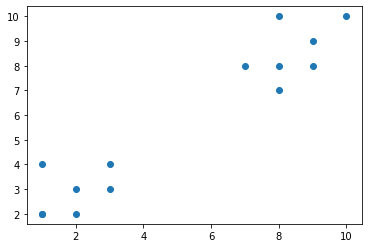

In [14]:
plt.scatter(x_data, y_data)
plt.show()

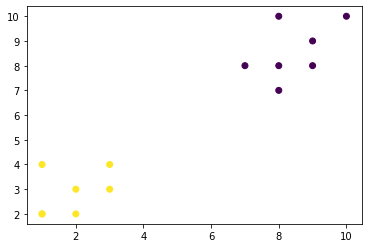

In [15]:
plt.scatter(x_data, y_data, c = labels)
plt.show()